<a href="https://colab.research.google.com/github/Sepideap/Global-Data-on-Sustainable-Energy/blob/main/Sepi_%26_Yana_vs_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Fraud is bad. Don't commit no fraud</h1>

In [ ]:
import pathlib
from google.colab import drive
import pandas as pd

url = 'https://raw.githubusercontent.com/YanaGilBCN/dspt11-YanaSepi-FinalProject/f98c89d6cf865d6e681093245eec0496013f7347/fraud_oracle.csv'
df_fraud = pd.read_csv(url)
df_fraud_backup = df_fraud.copy()
df_fraud_yana = df_fraud.copy()


In [ ]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


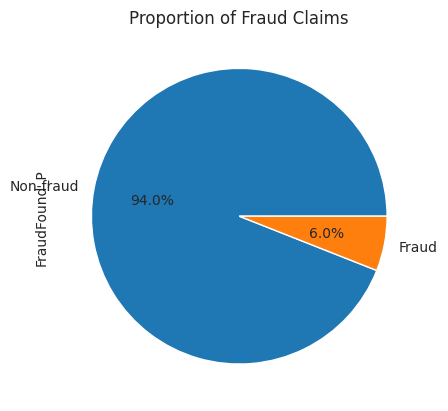

In [ ]:

# Proportion of fraud claims
fraud_proportion = df_fraud['FraudFound_P'].value_counts(normalize=True)
fraud_proportion.plot.pie(labels=['Non-fraud', 'Fraud'], autopct='%1.1f%%')
plt.title('Proportion of Fraud Claims')
plt.show()

NB: **Six percent** of insurance claims are fraud!

In [ ]:
#unique values
for i in df_fraud.columns:
    print(i, end=" ")
    if df_fraud[i].nunique()>20:
        print(f'{df_fraud[i].unique()[:10]} . . .')
    else:
        print(f'{df_fraud[i].unique()}')
    print("="*50,end="\n\n")

Month ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth [5 3 2 4 1]

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea ['Urban' 'Rural']

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

WeekOfMonthClaimed [1 4 2 3 5]

Sex ['Female' 'Male']

MaritalStatus ['Single' 'Married' 'Widow' 'Divorced']

Age [21 34 47 65 27 20 36  0 30 42] . . .

Fault ['Policy Holder' 'Third Party']

PolicyType ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory ['S

**For PastNumberOfClaims and NumberOfSuppliments 'none' act as a category itself**



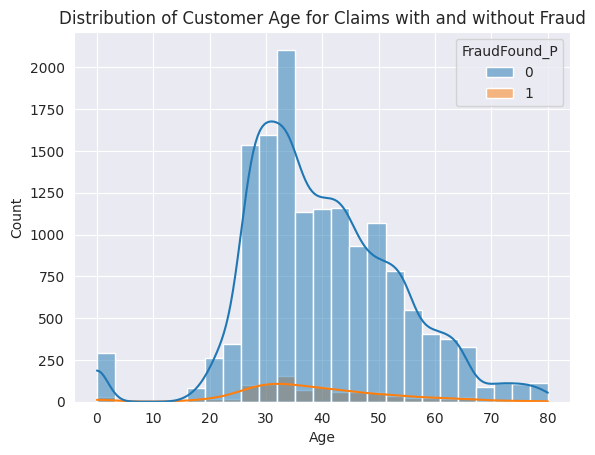

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.histplot(data = df_fraud, x ='Age', hue = 'FraudFound_P', kde=True, bins = 25)
plt.title('Distribution of Customer Age for Claims with and without Fraud')
plt.show()

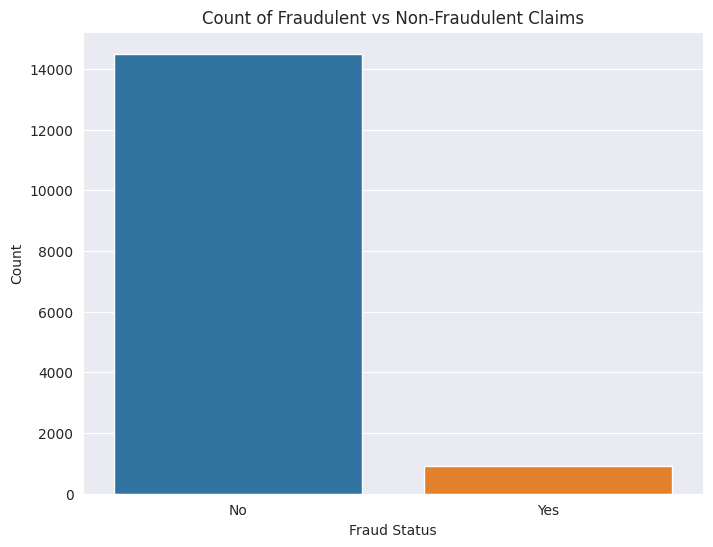

In [ ]:
# Count the occurrences of each label
fraud_counts = df_fraud['FraudFound_P'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Count of Fraudulent vs Non-Fraudulent Claims')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Adjust the x-ticks if necessary
plt.show()


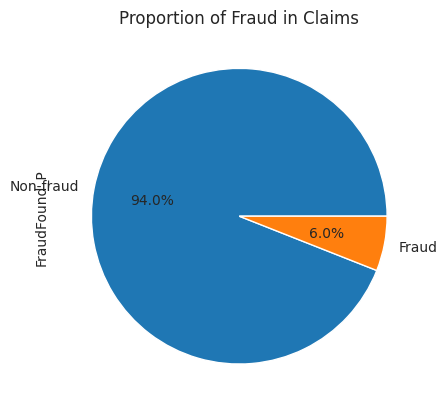

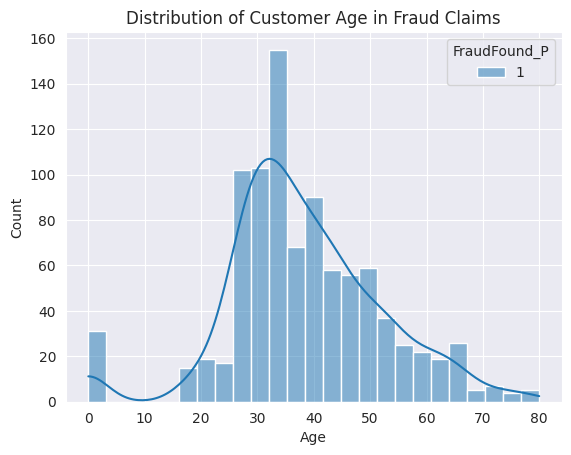

In [ ]:
sns.set_style('darkgrid')
sns.histplot(data = df_fraud[df_fraud['FraudFound_P'] == 1], x='Age', hue='FraudFound_P', kde=True, bins=25)
plt.title('Distribution of Customer Age in Fraud Claims')
plt.show()

In [ ]:
df_fraud_objects = df_fraud.select_dtypes(include='object')
#df_fraud_objects.columns

In [ ]:
df_fraud_objects_reduced = df_fraud_objects[['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'DayOfWeek',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy']]


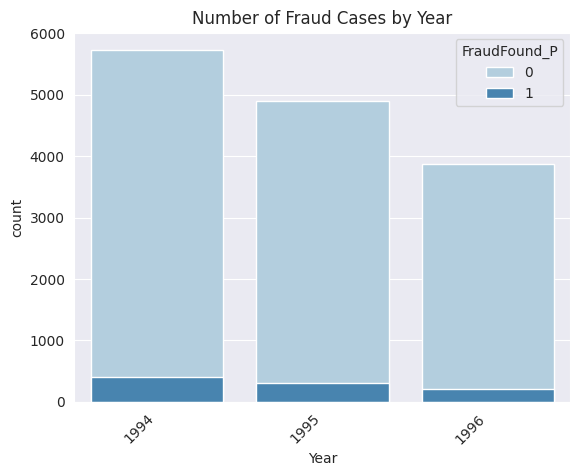

In [ ]:
    sns.set_style('darkgrid')
    ax = sns.countplot(data = df_fraud, x= 'Year', hue = 'FraudFound_P', dodge = False, palette='Blues')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title(f'Number of Fraud Cases by Year')
    plt.show()



Make


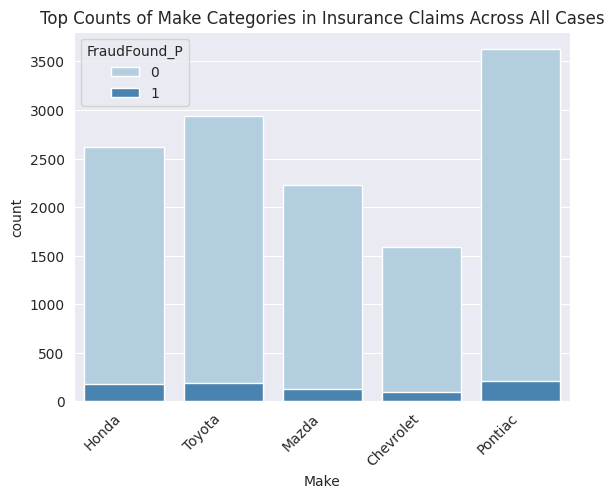

AccidentArea


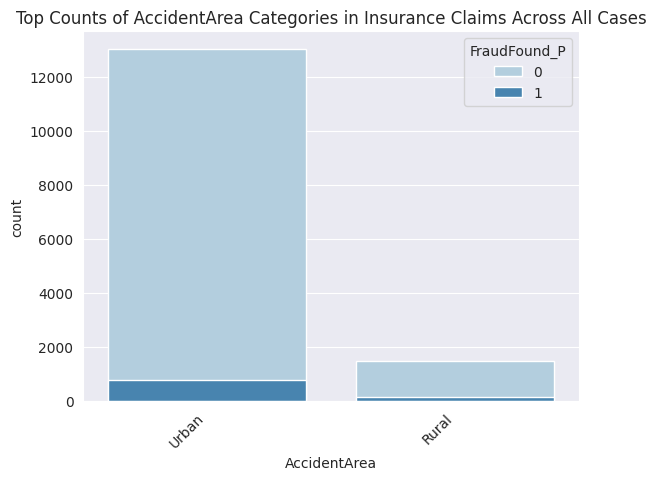

Sex


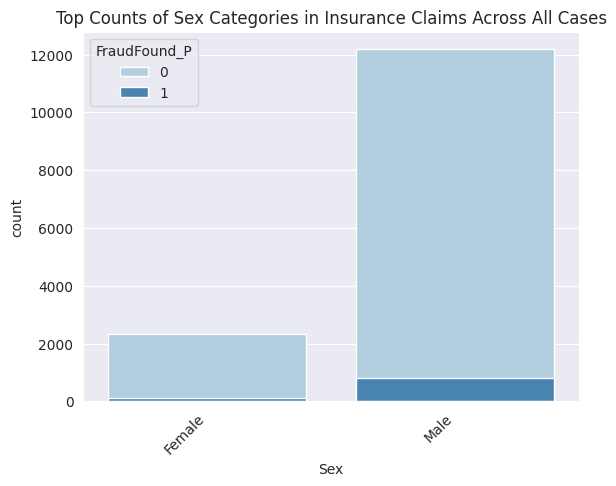

MaritalStatus


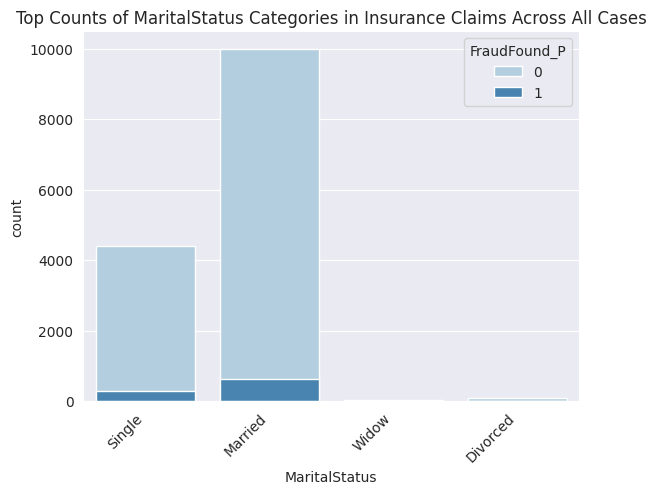

Fault


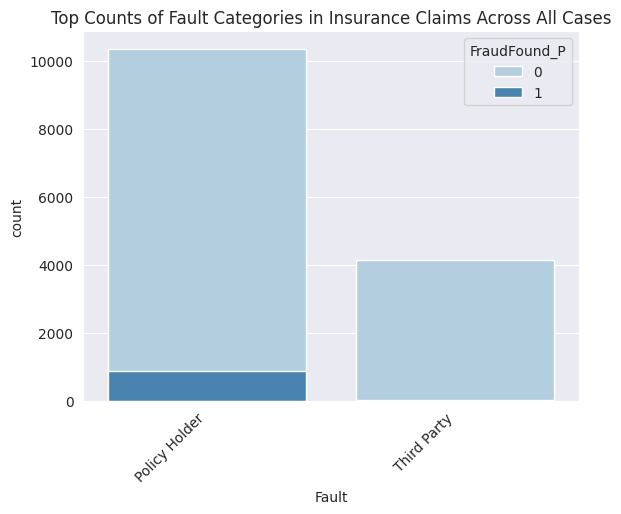

PolicyType


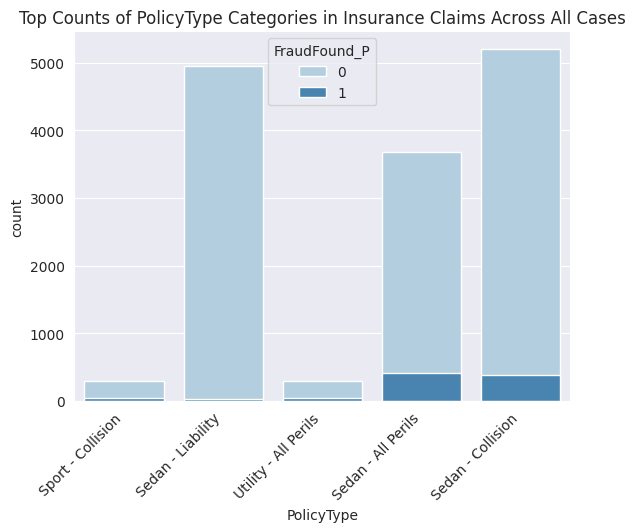

VehicleCategory


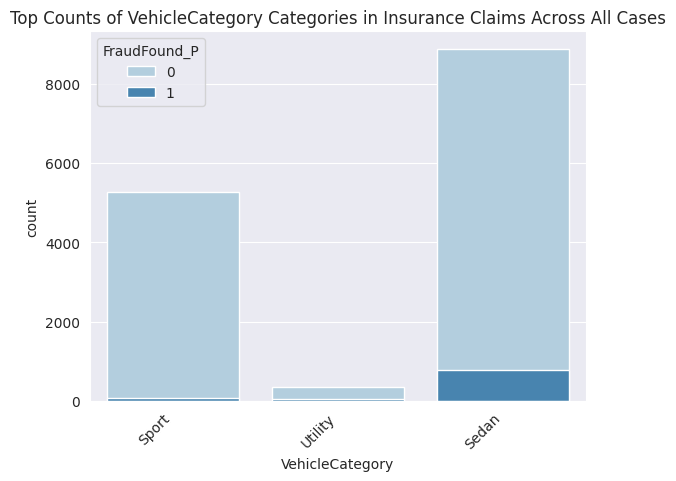

VehiclePrice


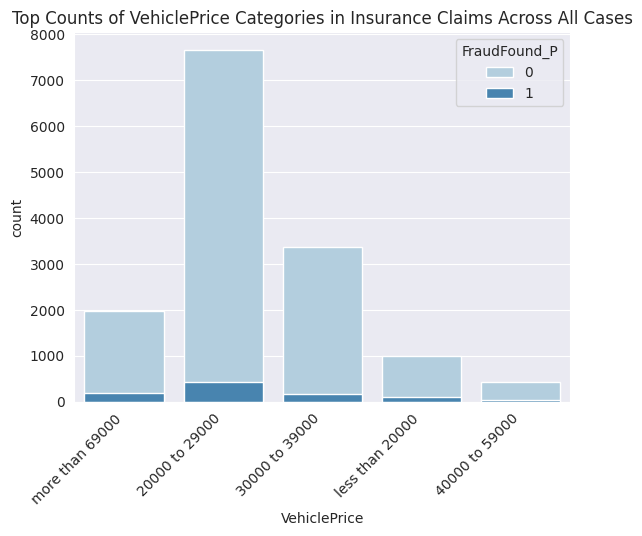

Days_Policy_Accident


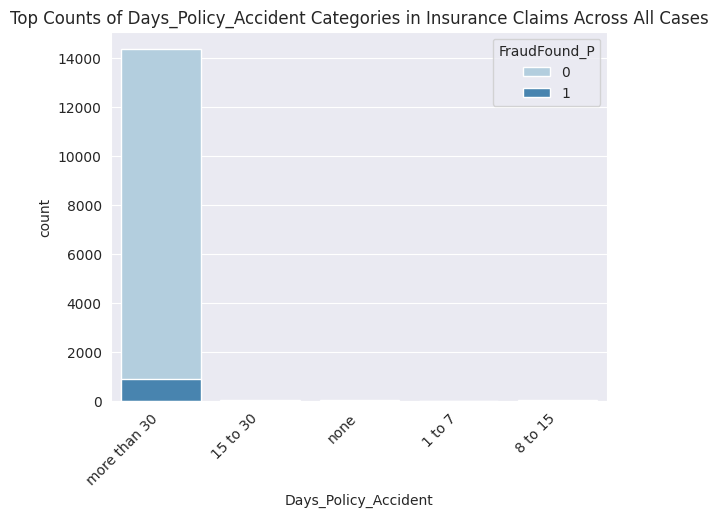

DayOfWeek


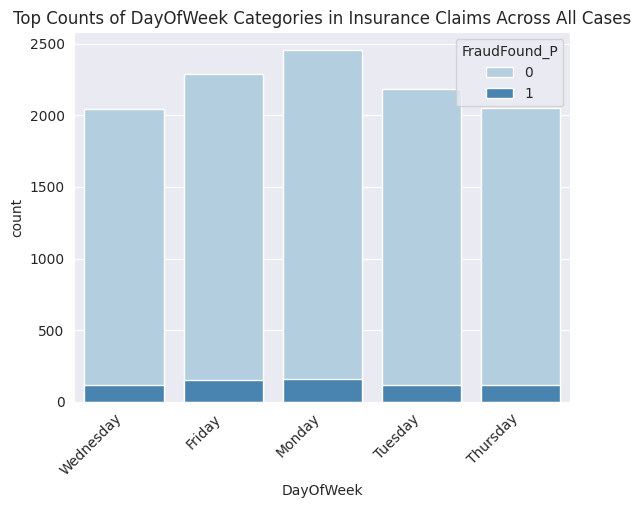

Days_Policy_Claim


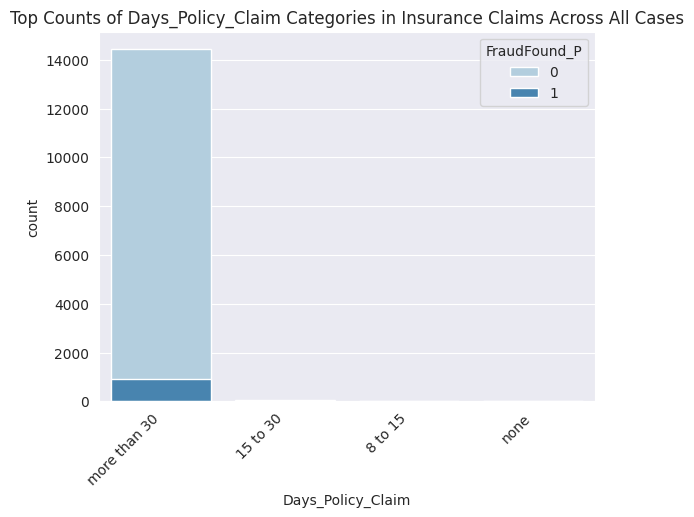

PastNumberOfClaims


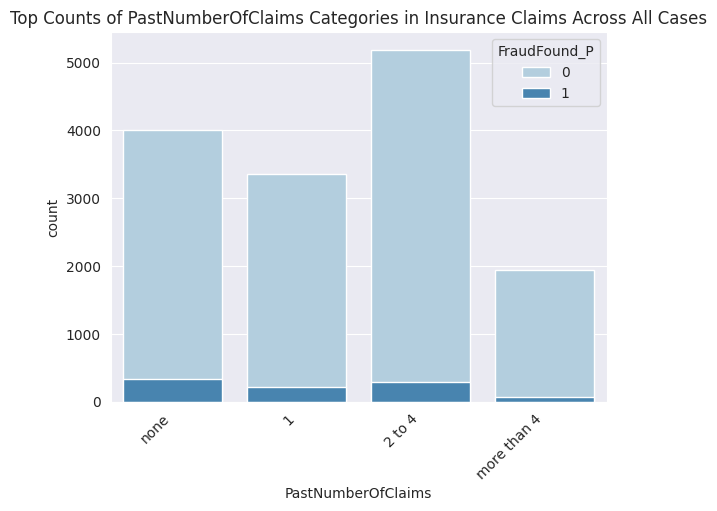

AgeOfVehicle


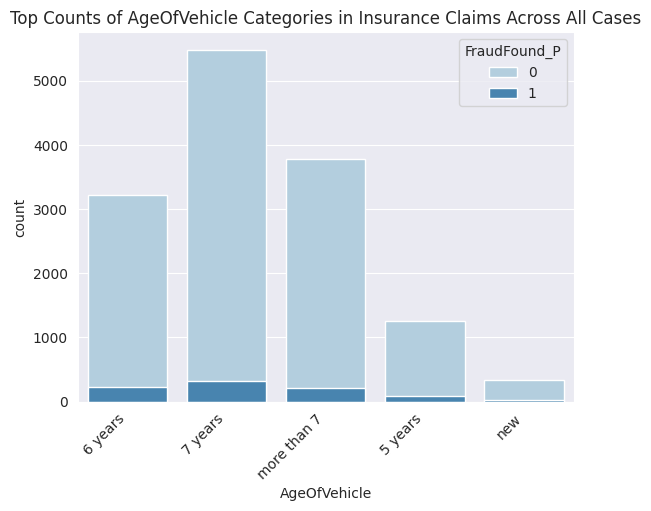

AgeOfPolicyHolder


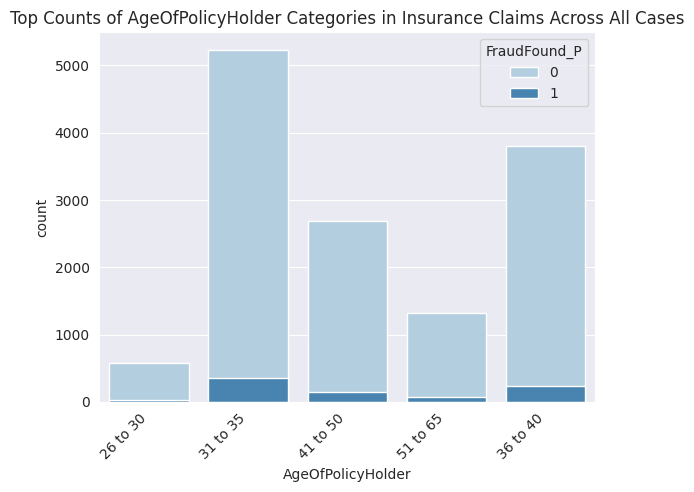

PoliceReportFiled


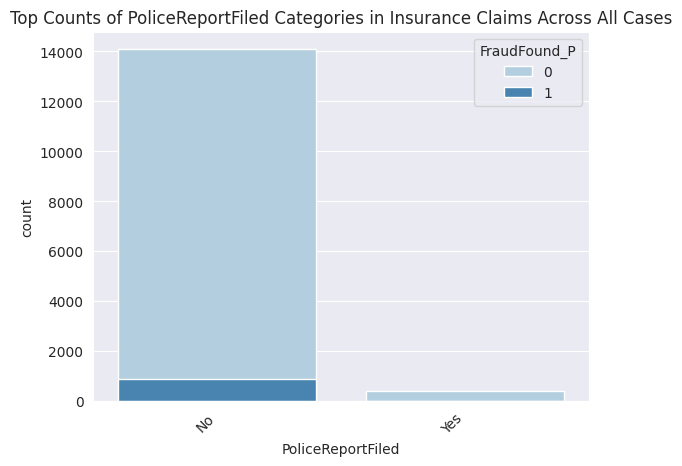

WitnessPresent


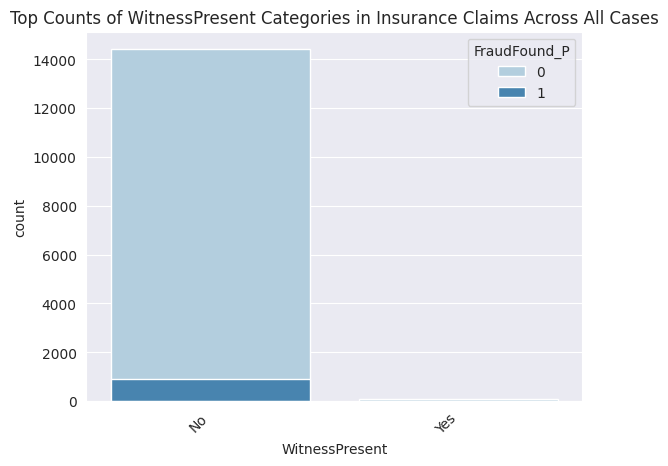

AgentType


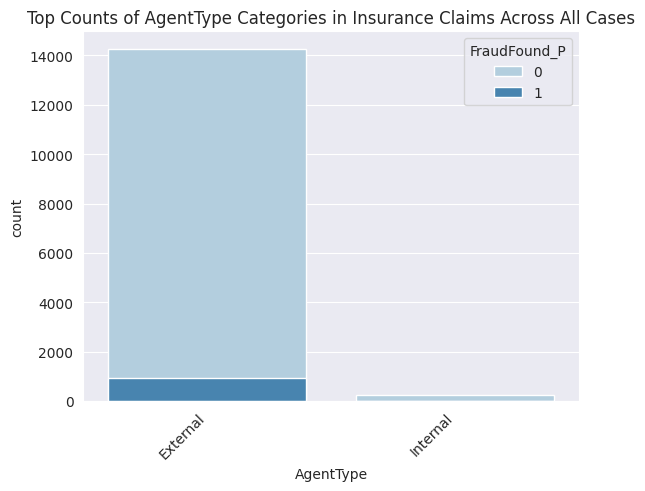

NumberOfSuppliments


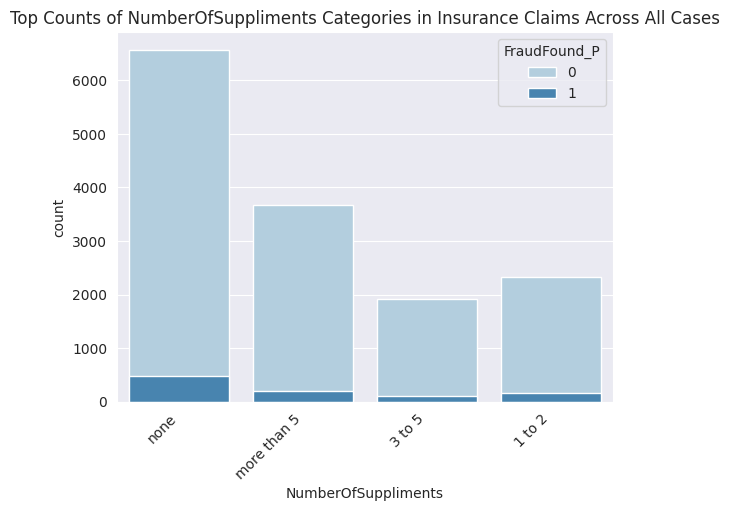

AddressChange_Claim


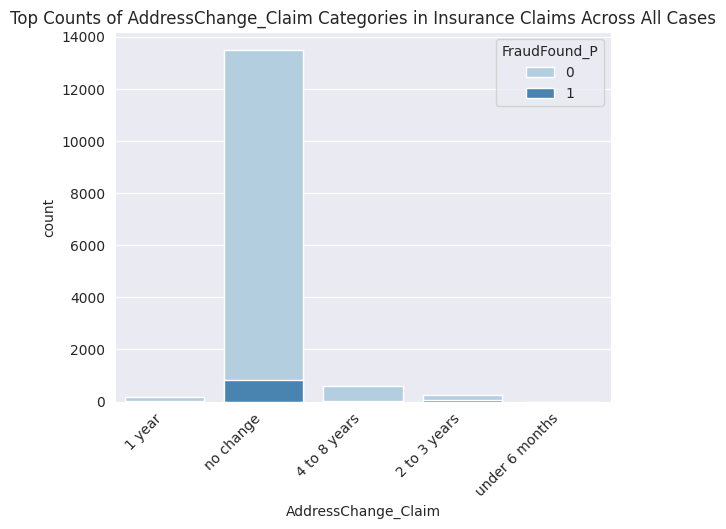

NumberOfCars


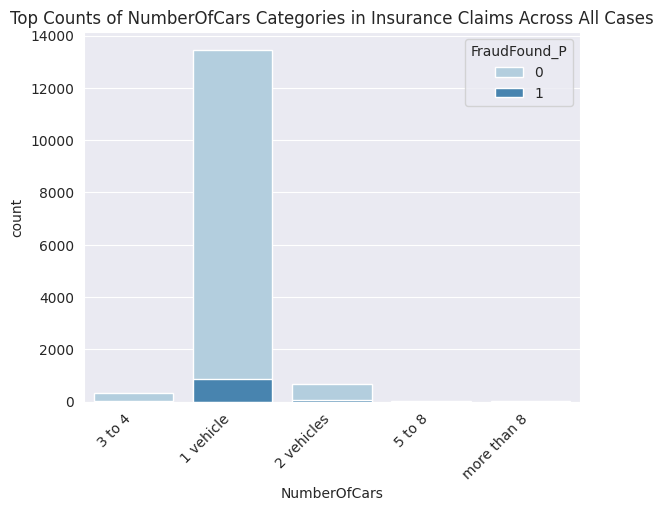

BasePolicy


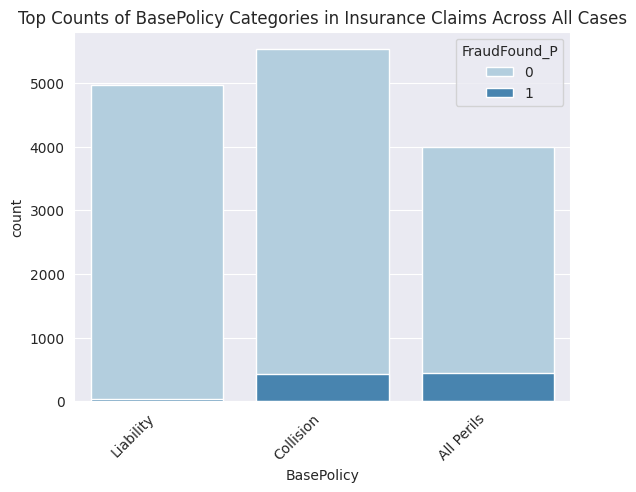

In [ ]:
for col in df_fraud_objects_reduced:
    print(col)
    sns.set_style('darkgrid')
    top_categories = df_fraud[col].value_counts().nlargest(5).index
    filtered_df = df_fraud[df_fraud[col].isin(top_categories)]
    ax = sns.countplot(data= filtered_df, x=col, hue='FraudFound_P', palette = 'Blues', dodge=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    # secrectly its Top 5 but we are not saying it in case its less than 5
    plt.title(f'Top Counts of {col} Categories in Insurance Claims Across All Cases')
    plt.show()

Features that might be important in fraud identification:

Example profile of the frauder: a married man, 31-35 yo is found to be at fault of an accident in the urban area without witnesses with a vehicle that is at least 7 years old. The man does not file a police report. Has a history of 2-4 claims filed in the past.

1. Car make (Pontiac > Toyota > Mazda)
2. Area accident took place (Urban >> Rural)
3. Gender of the customer (male >> female)
4. Marital status of the customer: married >> Single
5. Who is at fault: Policy Holder >> Third Party
6. Policy Type: Sedan-Collision > Sedan All Perils > Sedan Liability
7. Vehicle category: Sedan > Sports
8. Vehicle Price category: 20k-29k >> 30k-39k >> 69k
9. Number of days of Policy Accident: more than 30 days
10. Number of days of Policy Claim: more than 30 days
11. Number of Past Claims: 2-4 > none > 1
12. Age of Vehicle: 7 years > more than 7 years > 6 years
13. Age Policy Holder: 31-35 > 36-40 > 41-50
14. Number of Police Report Filed: No >> Yes
15. Witness Presence: No >> Yes
16. AgentType: External >> Internal
17. Number of Suppliments: none > more than 5 >> 1-2
18. Address Change: no change > 4-8 years > 2-3 years
19.  Number of cars:  1 vehicle > 2 vehicles > 3-4 vehicles
20. Base Policy: Collision > Liability > All Perils





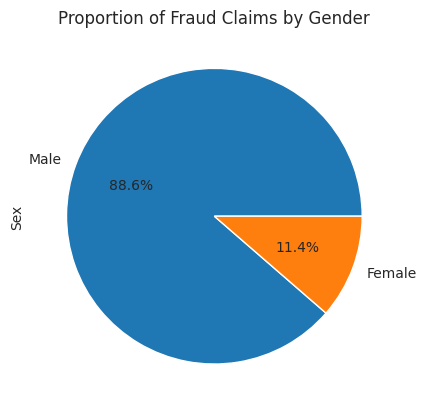

In [ ]:
#I think this pie chart is misleading
fraud_data = df_fraud[df_fraud['FraudFound_P'] == 1]

# Proportion of claims by gender
gender_counts = fraud_data['Sex'].value_counts(normalize=True)
gender_counts.plot.pie(labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Proportion of Fraud Claims by Gender')
plt.show()

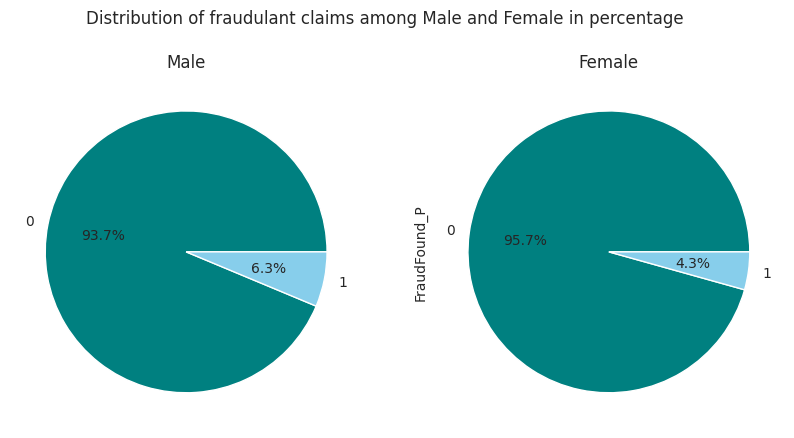

In [ ]:
#needs a little bit of retouch

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart for Male
male_data = df_fraud[df_fraud['Sex'] == 'Male']
male_data['FraudFound_P'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', colors=['teal', 'skyblue'])
axes[0].set_title('Male')
axes[0].set_ylabel('')

# Plot pie chart for Female
female_data = df_fraud[df_fraud['Sex'] == 'Female']
female_data['FraudFound_P'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=['teal', 'skyblue'])
axes[1].set_title('Female')
axes[0].set_ylabel('')
plt.suptitle('Distribution of fraudulant claims among Male and Female in percentage')
plt.show()

In [ ]:
# breakdown of the each column values
for column in df_fraud.columns:
    group_values = df_fraud[column].value_counts()
    print(pd.DataFrame(group_values))
    print('\n')

     Month
Jan   1411
May   1367
Mar   1360
Jun   1321
Oct   1305
Dec   1285
Apr   1280
Feb   1266
Jul   1257
Sep   1240
Nov   1201
Aug   1127


   WeekOfMonth
3         3640
2         3558
4         3398
1         3187
5         1637


           DayOfWeek
Monday          2616
Friday          2445
Tuesday         2300
Thursday        2173
Wednesday       2159
Saturday        1982
Sunday          1745


           Make
Pontiac    3837
Toyota     3121
Honda      2801
Mazda      2354
Chevrolet  1681
Accura      472
Ford        450
VW          283
Dodge       109
Saab        108
Mercury      83
Saturn       58
Nisson       30
BMW          15
Jaguar        6
Porche        5
Mecedes       4
Ferrari       2
Lexus         1


       AccidentArea
Urban         13822
Rural          1598


           DayOfWeekClaimed
Monday                 3757
Tuesday                3375
Wednesday              2951
Thursday               2660
Friday                 2497
Saturday                127
Sunday       

In [ ]:
for column in df_fraud.columns:
    unique_values = df_fraud[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Month': ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Unique values in column 'WeekOfMonth': [5 3 2 4 1]
Unique values in column 'DayOfWeek': ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Unique values in column 'Make': ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Unique values in column 'AccidentArea': ['Urban' 'Rural']
Unique values in column 'DayOfWeekClaimed': ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
Unique values in column 'MonthClaimed': ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Unique values in column 'WeekOfMonthClaimed': [1 4 2 3 5]
Unique values in column 'Sex': ['Female' 'Male']
Unique values in column 'MaritalStatus': ['Single' 'Married' 'Widow' 'Divorced']
Unique values in column 'Age': [21 34 47 65 27

In [ ]:
df_encoded = pd.get_dummies(df_fraud, drop_first=True)

In [ ]:
pd.set_option('display.max_columns', None)
df_encoded.head(3)


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice_30000 to 39000,VehiclePrice_40000 to 59000,VehiclePrice_60000 to 69000,VehiclePrice_less than 20000,VehiclePrice_more than 69000,Days_Policy_Accident_15 to 30,Days_Policy_Accident_8 to 15,Days_Policy_Accident_more than 30,Days_Policy_Accident_none,Days_Policy_Claim_8 to 15,Days_Policy_Claim_more than 30,Days_Policy_Claim_none,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,0,1,12,300,1,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,3,4,34,0,2,15,400,4,1994,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,5,2,47,0,3,7,400,3,1994,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
correlation_matrix = df_encoded.corr()

In [ ]:
# columns list
cols_list = list(df_encoded.columns)
# remove the target (to add later in the end or beginning of the list)
cols_list.remove("FraudFound_P")
# add e.g., in the beginning
cols_list = ["FraudFound_P"]+cols_list
correlation_matrix = df_encoded[cols_list].corr()

In [ ]:
correlation_matrix

,FraudFound_P,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice_30000 to 39000,VehiclePrice_40000 to 59000,VehiclePrice_60000 to 69000,VehiclePrice_less than 20000,VehiclePrice_more than 69000,Days_Policy_Accident_15 to 30,Days_Policy_Accident_8 to 15,Days_Policy_Accident_more than 30,Days_Policy_Accident_none,Days_Policy_Claim_8 to 15,Days_Policy_Claim_more than 30,Days_Policy_Claim_none,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
FraudFound_P,1.000000,-0.011861,-0.005761,-0.029741,-0.020345,-0.007551,0.017348,0.007266,-0.024760,0.017373,-0.014754,0.006195,0.002410,-0.015227,0.000907,0.019853,0.011710,-0.026409,-0.007969,0.001786,0.002486,0.010915,0.015144,-0.007912,-0.013561,-0.011212,0.000896,-0.005807,-0.014764,-0.002874,0.009849,0.008040,-0.004978,-0.002032,-0.013609,0.012911,0.003855,-0.004937,-0.010542,-0.004544,0.014867,0.011291,-0.000554,-0.018208,-0.033499,0.010787,-0.005658,0.007254,-0.000531,-0.011013,-0.002657,0.007895,0.005886,0.025849,-0.020425,0.000952,0.005107,-0.017514,0.000596,0.015788,0.016632,-0.030580,-0.006940,0.003674,0.029953,0.001781,-0.001410,0.005199,-0.131389,0.028302,-0.153413,-0.009538,0.050010,-0.002032,0.038441,0.007471,-0.009318,-0.135903,0.035815,-0.023727,0.005467,-0.004407,0.039787,0.046806,0.000325,0.007832,-0.019842,0.026174,0.012921,-0.016690,-0.002032,-0.019597,-0.042476,0.047680,0.010797,0.016482,0.013291,0.014180,-0.012746,-0.020172,0.017212,0.009665,0.031258,-0.005167,0.014339,-0.003110,-0.017856,-0.012708,-0.000624,-0.016007,-0.008057,-0.022978,-0.019241,-0.023000,0.027541,0.067467,-0.006582,-0.034467,0.046863,0.000732,0.011996,-0.001905,-0.002874,0.043860,-0.154007
WeekOfMonth,-0.011861,1.000000,0.275400,-0.004810,-0.007797,0.005283,-0.003993,-0.016817,-0.003906,0.013210,0.024177,-0.045750,0.003722,-0.003912,0.002030,0.003290,0.000178,-0.003776,0.010477,0.009289,0.007523,-0.004361,-0.023703,0.008310,0.000177,-0.006322,0.005124,-0.004139,0.018664,-0.011399,-0.00444

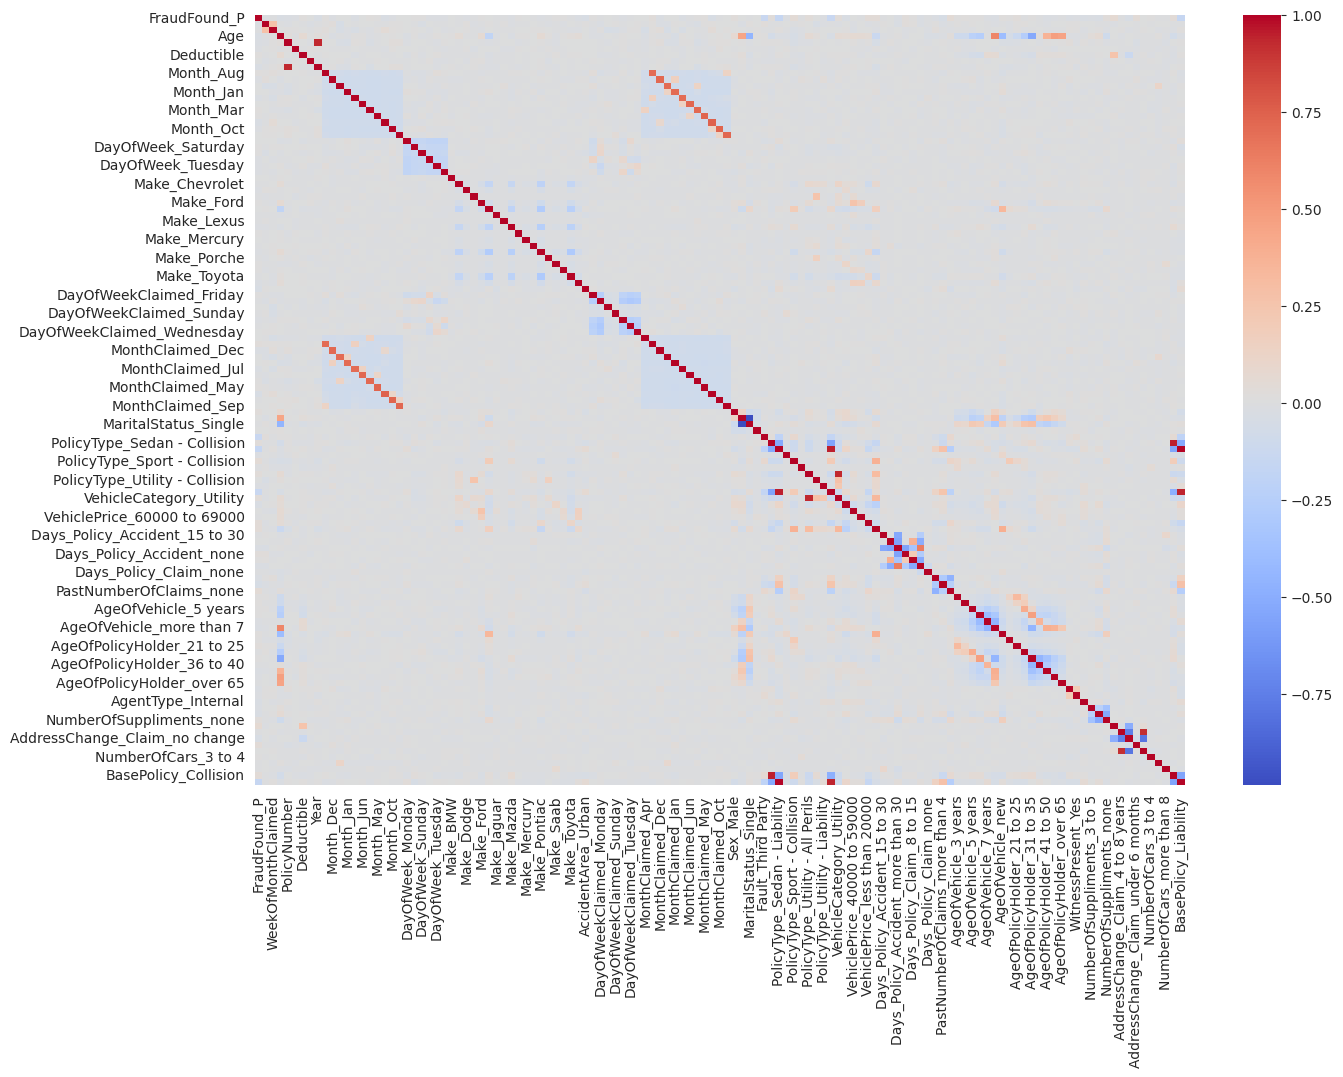

In [ ]:
#This one is not insightful - to be removed
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()


In [ ]:
df_fraud[df_fraud['FraudFound_P'] == 1].head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,29,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,21,Policy Holder,Sport - Collision,Sport,more than 69000,1,53,4,400,4,more than 30,more than 30,none,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,50,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,54,13,400,1,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,1,95,7,400,3,more than 30,more than 30,none,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,38,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,97,7,400,2,more than 30,more than 30,1,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision


<Figure size 1000x600 with 0 Axes>

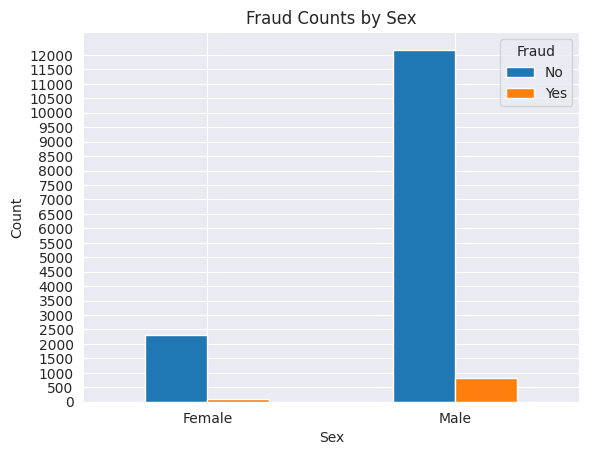

In [ ]:
import pandas as pd

# Group by 'Sex' and 'Fraud' and count the occurrences
grouped_data = df_fraud.groupby(['Sex', 'FraudFound_P']).size().unstack()
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=False)
plt.title('Fraud Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the Sex labels horizontal
plt.legend(title='Fraud', labels=['No', 'Yes'])
max_count = grouped_data.values.max()  # Find the maximum count
plt.yticks(range(0, max_count + 1, 500))  # Set intervals of 500 (adjust as needed)
plt.show()


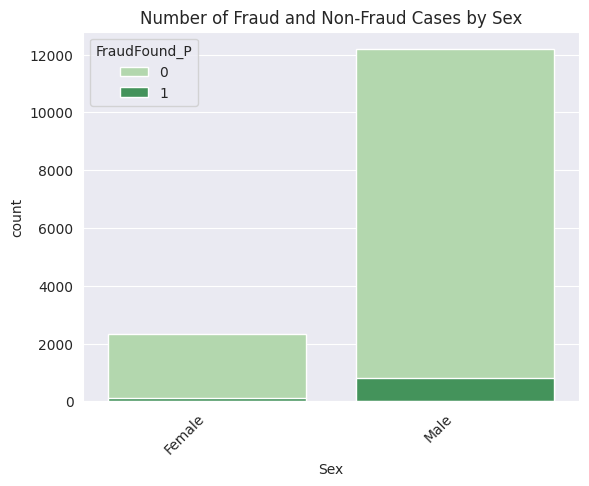

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
ax = sns.countplot(data=df_fraud, x='Sex', hue='FraudFound_P', palette='Greens', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Number of Fraud and Non-Fraud Cases by Sex')
plt.show()


In [ ]:
for idx, row in df_fraud.iterrows():
    day_of_week = row['DayOfWeek']
    df_fraud.loc[idx, "is_weekend"] = True if day_of_week in ["Saturday", "Sunday"] else False

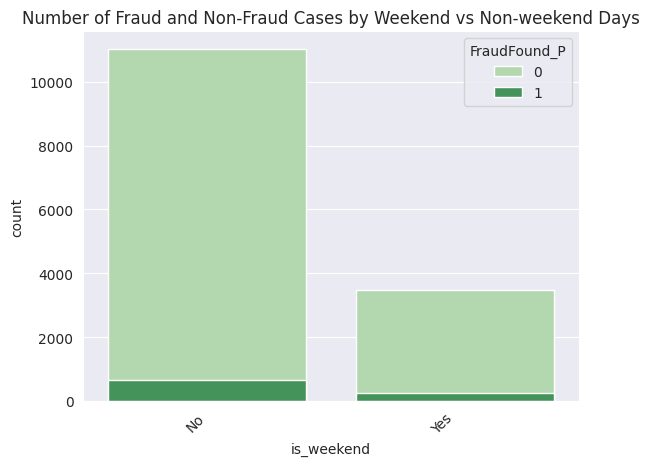

In [ ]:
sns.set_style('darkgrid')
ax = sns.countplot(data=df_fraud, x='is_weekend', hue='FraudFound_P', palette='Greens', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Number of Fraud and Non-Fraud Cases by Weekend vs Non-weekend Days')
plt.show()


In [ ]:
# to do/ discuss:

# DID: changed the code in the for-loop for bar plots to display ALL claims with the FRAUD cases stacked with non-fraud cases in each variable category
# DID: recode day of the week to weekend/not weekend?
# DID: added a pie chart at the beginning of EDA showing the proportion of fraud claims (6%)

# recode sex and maybe other variables? into 0/1 for stats and correlation
# some kind of log plot for probabilities of fraud_found from 0 to 1
# PCA to identify main factors. Plotting. Customer stratification to identify low, mid, high risk fraud-prone
# logistic regression + ensemble methods (decision tree, random forest). Model effeiciency evaluation.
# K-fold approach for a more accurate and generalizable approach


#Sepide:
#I think as the count of males/females is already biased (there are more male customers making insurance claim than females)
#then we cannot conclude that males do more fraud than females based on our current bar plots.
#but we can certainly say that the number of claimes made by males are higher, therefore
# males have more car accidents than females? (although we don't know if generally they have more male customers than females or not - not just based on claimes)????



# the columns which are relevant to keep for our model:
# Past number of claims
# Policy type
# age
#

In [ ]:
# Convert 'month_claimed' to integers
df_fraud['MonthClaimed'] = pd.to_numeric(df_fraud['MonthClaimed'], errors='coerce')

# Filter rows where 'month_claimed' is 0
rows_with_month_zero = df_fraud[df_fraud['MonthClaimed'] == 0]

# Display the filtered rows
print(rows_with_month_zero)


     Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

      MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  Age  \
1516           0.0                   1  Male        Single    0   

              Fault          PolicyType VehicleCategory     VehiclePrice  \
1516  Policy Holder  Sedan - All Perils           Sedan  more than 69000   

      FraudFound_P  PolicyNumber  RepNumber  Deductible  DriverRating  \
1516             0          1517         15         400             2   

     Days_Policy_Accident Days_Policy_Claim PastNumberOfClaims AgeOfVehicle  \
1516         more than 30              none               none          new   

     AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
1516          16 to 17                No             No  External   

     NumberOfSuppliments AddressChange_Claim NumberOfCars  Year  BasePolicy  
1516                none           no ch

# **Not fraud- we can get rid of this row then**

In [ ]:
#dropping the row where MonthClaimed is = 0.0
df_fraud = df_fraud[df_fraud['MonthClaimed'] != 0.0]

In [ ]:
#number of fraud/non-fraud cases
occ = df_fraud['FraudFound_P'].value_counts()
print(occ)

0    14496
1      923
Name: FraudFound_P, dtype: int64


In [ ]:
#ratio of fraud/non/fraud cases in the dataset
print(occ / len(df_fraud.index))

0    0.940139
1    0.059861
Name: FraudFound_P, dtype: float64


# As per above, only 6% of our data is actually helpful for training the model.

In [ ]:
# Assuming df_fraud is your DataFrame
fraud_column_index = df_fraud.columns.get_loc('FraudFound_P')
print(fraud_column_index)

15


In [ ]:
#import matplotlib.pyplot as plt

# Defining a function to create a scatter plot of our data and labels
#def prep_data(df_fraud):
    # Extract the target variable (label)
 #   y = df_fraud['FraudFound_P']
 #   # Extract the features (all other columns except the target)
 #   X = df_fraud.drop('FraudFound_P', axis=1)
 #   return X, y
#X, y = prep_data(df_fraud)
#def plot_data(X, y):
#	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="FraudFound_P #0", alpha=0.5, linewidth=0.15)
#	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="FraudFound_P #1", alpha=0.5, linewidth=0.15, c='r')
#	plt.legend()
#	return plt.show()
# Creating X and y from the prep_data function

# Plot data by running plot data function on X and y
#plot_data(X, y)

InvalidIndexError: ignored